In [89]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Basic Operations 
Deep Lizard

In [2]:
t = torch.tensor([[1,2],[3,4]])
t

tensor([[1, 2],
        [3, 4]])

In [3]:
t.shape

torch.Size([2, 2])

In [4]:
rank = len(t.shape) # len of shape = Rank
rank

2

In [5]:
print(t.device)
print(type(t))
print(t.type())
print(t.dtype)
print(t.layout)

cpu
<class 'torch.Tensor'>
torch.LongTensor
torch.int64
torch.strided


You can change the device to CUDA if you have GPU enabled

In [6]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

## Operations on Tensors are done IFF they are on same device only and IFF they have same dType (version > 1.3.0 can perform operations on float and int)

In [7]:
t1 = torch.tensor([[1,2],[2,3]])
t2 = torch.tensor([[1.1,2.2],[2.2,3.3]])
# t3 = t1.cuda() # No CUDA Present

In [8]:
print(t1.dtype)
print(t2.dtype)

torch.int64
torch.float32


In [9]:
t1+t2

tensor([[2.1000, 4.2000],
        [4.2000, 6.3000]])

## Create tensors from array or `data` and their differences

In [10]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

In [11]:
t1 = torch.Tensor(data)  # Constructor
# equivalent to t = torch.tensor(data,dtype=torch.float32)


print(t1)
print(type(t1))
print(t1.type())
print(t1.dtype)


tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.FloatTensor
torch.float32


In [12]:
t2 = torch.tensor(data) # Factory Function 
#  equivalent to t = torch.tensor(data,dtype=torch.int64)


print(t2)
print(type(t2))
print(t2.type())
print(t2.dtype)

tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [13]:
t3 = torch.from_numpy(data) # Factory Function

print(t3)
print(type(t3))
print(t3.type())
print(t3.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [14]:
t4 = torch.as_tensor(data) # Factory Function

print(t4)
print(type(t4))
print(t4.type())
print(t4.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


### Modify values of `data` now

In [15]:
data[0] = 5
data[2] = 7

In [16]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([5, 2, 7])
tensor([5, 2, 7])


SEE the DIFFERENCE? First 2 use `COPY` of data. Last 2 `SHARE` the same instances

### Reshaping, stacking, Flattening

In [17]:
# each value represents a pixel of 4*4 image
one = torch.tensor([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]).reshape(4,4)  # converts into a 4*4 matrix
two = torch.tensor([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]).reshape(4,4)
three = torch.tensor([3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]).reshape(4,4) 
stacked = torch.stack((one,two,three)) # make a batch of 3 images so shape is (3,4,4)
stacked_reshaped = stacked.reshape((3,1,4,4)) # batch, color channels, height, width
stacked_reshaped_flattened = stacked_reshaped.flatten(start_dim=1) 
# leave te batch but flatten all the pixels
stacked_reshaped_flattened

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [18]:
another_method = stacked_reshaped.reshape((3,16)) # Flatten each image
another_method

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

### Tensor broadcasting
Tensor works only and only on  `Element vise` operations

In [19]:
print(t1*(3))
print(t1.mul(3))
# it is not scaler multiplication but the scaler is broadcasted

tensor([3., 6., 9.])
tensor([3., 6., 9.])


In [20]:
# To get the idea, it is like copying a scaler to same dimension and then checking every element
# of one tensor to every element of second on the same index
t1%2 == 0 

tensor([False,  True, False])

In [21]:
# It is just like making an tensor of same shape as of given tensor but with all the scaler values
broadcasted_3 = torch.from_numpy(np.broadcast_to(3,t1.shape))
print(f'Broadcasted tensor: {broadcasted_3}')
print(t1*broadcasted_3)
print(t1.mul(broadcasted_3))

Broadcasted tensor: tensor([3, 3, 3])
tensor([3., 6., 9.])
tensor([3., 6., 9.])


# Torchvision Datasets

In [22]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32)

In [23]:
len(train_set.targets)

60000

In [24]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [25]:
sample = next(iter(train_set))
print(type(sample))
print(len(sample))
# first entry sample[0] are the pixels and second is the label
pixels,label = sample
print(pixels.shape)

<class 'tuple'>
2
torch.Size([1, 28, 28])


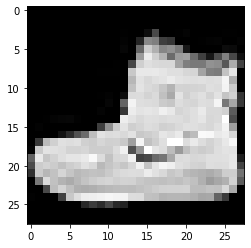

In [26]:
plt.imshow(pixels.reshape(28,28),cmap='gray')
# plt.imshow(pixels.squeeze())

In [27]:
batch = next(iter(train_loader))
print(len(batch))
print(type(batch))

2
<class 'list'>


In [28]:
images,labels = batch
print(len(images),len(labels))
print(type(images))
print(images.shape)

32 32
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])


tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])


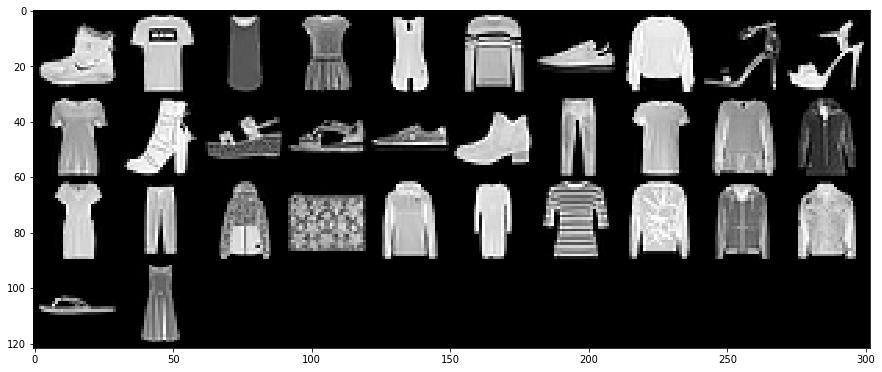

In [29]:
grid = torchvision.utils.make_grid(images,nrow=10) #nrow is number of elements in a single row
plt.figure(figsize=(15,12))
plt.imshow(np.transpose(grid,(1,2,0))) # transpose to (h,w,c) instead of (c,h,w)
print(labels)

# CNN Architecture

In [30]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv_1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),bias=True)
        # for single grayscale image use 6 different kernls of size (5,5) to produce 6 diff feature maps 
        
        self.conv_2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3))
        # 6 already feat maps, use 12 different kernal filters of size (3,3) to get TOTAL of 12 new feat
        
        self.dense_1 = nn.Linear(in_features=12*4*4,out_features=128) # WHYY (12*4*4)
        # Flatten the output of conv_2d in 12*4*4
        
        self.fc_2 = nn.Linear(in_features=128,out_features=64)
        # Fully Connected = fc_2 = Dense Layer = dense_2
        
        self.out = nn.Linear(in_features=64,out_features=10)
        # output layer. Output number of neurons = num of classes for classification & 1 for regression
        
    
    def forward(self,t):
        '''
        implement a forward pass on a Tensor 't' of rank 'R'
        '''
        # input  layer 1 though it is nevr needed
        t = t
        
        # second layer. Layer is a mix of functions that has weights 
        t = self.conv_1(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a leyer but Function as layers have weights
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pool
        
        # third layer
        t = self.conv_2(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a leyer but Function as layers have weights
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pool
        
        # fourth layer
        t = t.reshape(-1,12*4*4) 
        # due to Conv and pooling operations, our image has been reduced from (1,28,28) to (4,4)
        # use ((input_size - filter_size + 2*padding)/stride )+1  for each  cov and max_pool 
        # it assumes input and kernel size are square
        t = self.dense_1(t)
        t = F.relu(t)
        
        # Fifth layer
        t = self.fc_2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        # t = F.softmax(t,dim=1)
        # commented because loss function used will be cross_entropy which has softmax behind the scenes
        
        
        return t

In [31]:
network = Network() # instantiate object of Nwtwork

In [32]:
torch.set_grad_enabled(False) # stop making computational graphs

### Input should be always `(BATCH,CHANNELS,HEIGHT,WIDTH)` for Convolution Networks

In [33]:
sample = next(iter(train_set))
image, label = sample
image.shape # add a new index to the the image to convert it into a batch of 1

torch.Size([1, 28, 28])

In [34]:
batch_image = image.reshape((1,1,28,28))
print(batch_image.shape)

# or by using 

batch_image = image.unsqueeze(dim=0)
print(batch_image.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


In [35]:
y_pred = network(batch_image) 
y_pred # y_pred is NOT the  probabilities for each label. These are final output Tensor because
# we have not used softmax

tensor([[ 0.0672,  0.1479, -0.0785,  0.0633, -0.0677, -0.1234,  0.0069,  0.0163,
          0.0943, -0.0311]])

In [36]:
F.softmax(y_pred,dim=1) # these are the probabilities for each class

tensor([[0.1056, 0.1145, 0.0913, 0.1052, 0.0923, 0.0873, 0.0994, 0.1003, 0.1085,
         0.0957]])

In [37]:
y_pred.shape # shape is (1,10) means 1 image and 10 predictions

torch.Size([1, 10])

In [38]:
y_pred.argmax(dim=1) # get the index where value is maximum

tensor([1])

# Load Batch

In [39]:
torch.set_grad_enabled(True) # True by default but as we had turned it off so turning it on

In [40]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32) 

In [41]:
batch = next(iter(train_loader)) # make a new batch from DataLoader
images,labels = batch # get images and labels from batch

In [42]:
print(len(labels)) # 32 labels for 32 images
print(images.shape) # 32 grayscale images of size (28,28)

32
torch.Size([32, 1, 28, 28])


In [43]:
network = Network() # weights are random everytime you initialize
pred = network(images)
pred.shape # 10 labels for each of 32 images

torch.Size([32, 10])

In [44]:
pred.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])

In [46]:
pred.argmax(dim=1).eq(labels) # element wise operation. Return True if equal else return False

tensor([False, False, False, False, False,  True, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False])

In [47]:
def get_correct_pred(pred,labels,percent=False):
    num = pred.argmax(dim=1).eq(labels).sum().item()
    if percent:
        return (num/len(labels))*100 # 4 out of 32 correct predictions
    else:
        return num

In [48]:
print(f'{get_correct_pred(pred,labels,True)}% of labels have been predicted correctly')

9.375% of labels have been predicted correctly


# Calculating Loss and Gradients

In [49]:
loss = F.cross_entropy(pred,labels)
loss.item() # this is our loss function

2.3032639026641846

In [50]:
print(network.conv_1.weight.grad) # No Gradients on the First Pass

None


In [51]:
loss.backward() # works only if set_grad_anable(True)

In [52]:
print(network.conv_1.weight.grad.shape) # Updated Gradients

torch.Size([6, 1, 5, 5])


In [53]:
print(network.conv_2.weight.grad.shape)

torch.Size([12, 6, 3, 3])


# Updating Weights using Gradients

Use these in order `opt.zero_grad()`, `loss.backward()`, `opt.step()`

1. `zero_grad` clears old gradients from the last step (otherwise you’d just accumulate the gradients from all `loss.backward()` calls).

2. `loss.backward()` computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.

3. `opt.step()` causes the optimizer to take a step based on the gradients of the parameters.

In [54]:
optimizer = optim.Adam(network.parameters(),lr=0.01)

In [55]:
optimizer.step() # update weights

In [56]:
# Predict again and you will see a decrease in loss

pred = network(images)
print(get_correct_pred(pred,labels))
loss = F.cross_entropy(pred,labels)
loss.item()

6


2.2617602348327637

`network.zero_grad()` and `optimizer.zero_grad()` are the same IFF all your model parameters are in that optimizer just like we have `optimizer = optim.Adam(network.parameters(),lr=0.01)`. 

I found it is safer to call ```network.zero_grad()``` to make sure all grads are zero, e.g. if you have two or more optimizers for one model.

# Epoch Model Training

In [57]:
network = Network()
optimizer = optim.Adam(network.parameters(),lr=0.01)

for epoch in range(2):
    
    total_loss = 0
    total_accuracy = 0

    train_loader = torch.utils.data.DataLoader(train_set,batch_size=128)  # load the data every time
    for batch in tqdm(train_loader): 
        images,labels = batch

        pred = network(images)
        loss = F.cross_entropy(pred,labels,reduction='sum')
        # or you can do 
        # F.cross_entropy(pred,labels)* batch_size

        optimizer.zero_grad()
        # network.zero_grad() # we can use this too
        loss.backward()
        optimizer.step()

        total_loss+= loss.item()
        total_accuracy+= get_correct_pred(pred,labels)
    
    acc = (total_accuracy/len(train_set))
    avg_loss = (total_loss/len(train_set))
    print(f"End of Epoch: {epoch+1}, Training Accuracy: {acc}, Average Training Loss: {avg_loss}")

  0%|          | 2/469 [00:00<00:31, 15.02it/s]

End of Epoch: 1, Training Accuracy: 0.7576333333333334, Average Training Loss: 0.6208274251937866


100%|██████████| 469/469 [00:26<00:00, 17.50it/s]

End of Epoch: 2, Training Accuracy: 0.8384333333333334, Average Training Loss: 0.430281628036499


# Getting Predictions after training

In [65]:
# @torch.no_grad() # if decorator is used here, we don't need wit torch.no_grad() later
def get_all_pred_from_loader(model,loader):
    all_pred = torch.Tensor([])
    for batch in loader:
        images,labels = batch
        pred = model(images)
        
        all_pred = torch.cat((all_pred,pred),dim=0)
    return all_pred

In [66]:
with torch.no_grad(): # we do not want to compute gradients
    loader = torch.utils.data.DataLoader(train_set,batch_size=128)
    preds = get_all_pred_from_loader(network,loader)

In [70]:
total_correct = get_correct_pred(preds,train_set.targets)
accu = total_correct/len(train_set)
print(acc)

0.8384333333333334


# Build Confusion Matrix

In [80]:
stacked = torch.stack((train_set.targets,preds.argmax(dim=1)),dim=1)
print(stacked.shape)
stacked[:5] # original, predicted

torch.Size([60000, 2])


tensor([[9, 9],
        [0, 0],
        [0, 0],
        [3, 0],
        [0, 0]])

### You can try to use concat but it won't make columns. Concat works like `list.extend()`

In [79]:
concat = torch.cat((train_set.targets,preds.argmax(dim=1)),dim=-1) # or use dim=0 . dim=1 gives error
print(concat.shape)
concat[:5] # original, predicted

torch.Size([120000])


tensor([9, 0, 0, 3, 0])

In [88]:
conf_mat = torch.zeros((10,10),dtype=torch.int32)
for row_val in stacked:
    true,pred = row_val.tolist() # unpack row value
    conf_mat[true,pred] = conf_mat[true,pred]+1 # whatever value was there, +1. Because we have 0-9 label

conf_mat

tensor([[5533,    7,   58,   64,   20,    5,  181,    1,  130,    1],
        [  44, 5818,    1,  104,    7,    3,   13,    0,   10,    0],
        [  99,    6, 3712,   58, 1370,    4,  647,    0,  103,    1],
        [ 785,   44,   10, 4878,  144,    2,   92,    4,   34,    7],
        [  37,   23,  155,  277, 4946,    0,  489,    0,   71,    2],
        [   0,    0,    0,    0,    0, 5627,    0,  249,   25,   99],
        [1739,   12,  444,   94,  639,    2, 2892,    0,  177,    1],
        [   0,    0,    0,    0,    0,   75,    0, 5799,    4,  122],
        [  28,    1,   14,    7,   22,   23,   25,   10, 5864,    6],
        [   0,    0,    0,    0,    0,   18,    0,  279,    3, 5700]],
       dtype=torch.int32)

In [132]:
conf_mat2 = confusion_matrix(train_set.targets,preds.argmax(dim=1)) # sklearn
conf_mat2

array([[5533,    7,   58,   64,   20,    5,  181,    1,  130,    1],
       [  44, 5818,    1,  104,    7,    3,   13,    0,   10,    0],
       [  99,    6, 3712,   58, 1370,    4,  647,    0,  103,    1],
       [ 785,   44,   10, 4878,  144,    2,   92,    4,   34,    7],
       [  37,   23,  155,  277, 4946,    0,  489,    0,   71,    2],
       [   0,    0,    0,    0,    0, 5627,    0,  249,   25,   99],
       [1739,   12,  444,   94,  639,    2, 2892,    0,  177,    1],
       [   0,    0,    0,    0,    0,   75,    0, 5799,    4,  122],
       [  28,    1,   14,    7,   22,   23,   25,   10, 5864,    6],
       [   0,    0,    0,    0,    0,   18,    0,  279,    3, 5700]])

Text(51.0, 0.5, 'Actual Labels')

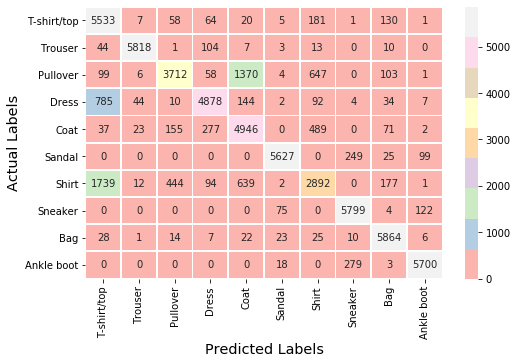

In [134]:
# change conf_mat tensor to numpy or directly pass conf_mat2
conf_df = pd.DataFrame(conf_mat.numpy(),columns=train_set.classes,index=train_set.classes)

f,ax = plt.subplots(1,1,figsize=(8,5))
sns.heatmap(conf_df,annot=True,lw=0.8,cmap='Pastel1',ax=ax,
            fmt='d', # fmt='d'/ fmt='g' for suppressing scientific notation
            annot_kws={"size": 10})

ax.set_xlabel('Predicted Labels',size='x-large')
ax.set_ylabel('Actual Labels',size='x-large')

# Load data from Numpy Array or Pandas DataFrame

In [139]:
my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
print(my_x,'\n')
my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets)
print(my_y,'\n')

tensor_x = torch.Tensor(my_x) # transform to torch tensor
print(tensor_x)
tensor_y = torch.Tensor(my_y)

my_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = torch.utils.data.DataLoader(my_dataset) # create your dataloader

[array([[1., 2.],
       [3., 4.]]), array([[5., 6.],
       [7., 8.]])] 

[array([4.]), array([2.])] 

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


# Loading images from Directory

In [141]:
def load_dataset():
    data_path = 'data/train/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return train_loader

# for batch_idx, (data, target) in enumerate(load_dataset()):
    #train network

# Keras type -Different classes in different folders- loading
[Link to demo and documentation](https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)

In [ ]:
# train_dataset=datasets.ImageFolder(root="./root/",transform=train_transforms)

# Stack vs Concat

![Stack verss concat scenario](stack_concat.png "Scenario")

Suppose we have a scenario where we have 3 individual images with `(C,W,H)` and three seperate images as `(B,C,W,H)`. What do we do now? 

Ans: Stack the upper three images and concat those with the below 3 to make a batch of 6 images

### Numpy has `np.stack()` and `np.concatenate()` functionality just like PyTorch so we can use these too

In [240]:
t1,t2,t3 = np.array([1,1,1]),np.array([2,2,2]),np.array([3,3,3])

#### Concatenate

In [230]:
x_simple_cat_dim0 = np.concatenate((t1,t2,t3),)
x_simple_cat_dim0


# Below code will produce error as there is no axis=1
# x_simple_cat_dim1 = np.concatenate((t1,t2,t3),axis=1)
# print(x_simple_cat_dim1)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

#### Concatenate + expand_dims

In [244]:
np.concatenate((np.expand_dims(t1,0),
                np.expand_dims(t2,0),
                np.expand_dims(t3,0)),
               axis=0)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3]])

In [246]:
np.concatenate((np.expand_dims(t1,0),
                np.expand_dims(t2,0),
                np.expand_dims(t3,0)),
               axis=1)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3]])

In [247]:
np.concatenate((np.expand_dims(t1,1),
                np.expand_dims(t2,1),
                np.expand_dims(t3,1)),
               axis=0)

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3]])

In [248]:
np.concatenate((np.expand_dims(t1,1),
                np.expand_dims(t2,1),
                np.expand_dims(t3,1)),
               axis=1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

#### Stack

In [238]:
x_simple_stack_dim0 = np.stack((t1,t2,t3),axis=0)
x_simple_stack_dim0

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [239]:
x_simple_stack_dim1 = np.stack((t1,t2,t3),axis=1)
x_simple_stack_dim1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### Stack -> {concat(expand_dims),stack}

In [258]:
np.stack((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=0)

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]])

This what we usually aim for. This is a batch of 2 made by stacking 2 grayscale images

In [259]:
np.stack((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=1)

array([[[1, 2, 3],
        [1, 1, 1]],

       [[1, 2, 3],
        [2, 2, 2]],

       [[1, 2, 3],
        [3, 3, 3]]])

### Concat -> {concat(expand_dims),stack}

In [262]:
np.concatenate((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [263]:
np.concatenate((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=1)

array([[1, 2, 3, 1, 1, 1],
       [1, 2, 3, 2, 2, 2],
       [1, 2, 3, 3, 3, 3]])

# Channel First Channel Last Problem Solution.
Sometimes when we have our data in the form of `(B,C,W,H)`and we have to feed the model with `(B,W,H,C)` or vice versa, then we'll have to change the axis. Numpy has a functionality for it and we can do it by using more than one method

In [173]:
x = np.zeros((3,10,20))
print('Before: ',x.shape)

# %timeit np.moveaxis(x,[0,1,2],[2,0,1])
x1 = np.moveaxis(x,[0,1,2],[2,0,1]) # use single digit for a single axis rotation
print('Method 1:', x1.shape)

# %timeit np.einsum('ijk->kij',x)
x2 = np.einsum('ijk->jki',x)
print('Method 2: ',x2.shape)

x3 = np.rollaxis(x, 0, 3)
print('Method 3: ',x3.shape)

x4 = np.transpose(x,axes=(1,2,0))
print('Method 4: ',x4.shape)

x5 = np.reshape(x,(10,20,3))
print('Method 5: ',x5.shape)

Before:  (3, 10, 20)
Method 1: (10, 20, 3)
Method 2:  (10, 20, 3)
Method 3:  (10, 20, 3)
Method 4:  (10, 20, 3)
Method 5:  (10, 20, 3)


# Adding an extra dimension as a batch inside a matrix in numpy
You can use np.reshape() and adding extra one dimension anywhere won't effect because number of elements will always be same

In [191]:
print('Original: ',x.shape)
print('Case 1: ',np.reshape(x,(1,3,1,1,10,20,1,1,1)).shape)
print('Case 2: ',np.reshape(x,(1,25,1,12,1,2,1)).shape)

Original:  (3, 10, 20)
Case 1:  (1, 3, 1, 1, 10, 20, 1, 1, 1)
Case 2:  (1, 25, 1, 12, 1, 2, 1)


In [185]:
for i in range(len(x.shape)+1):
    print('Add new axis at:',i)
    print('New Shape is: ',np.expand_dims(x,axis=i).shape,'\n')

Add new axis at: 0
New Shape is:  (1, 3, 10, 20) 

Add new axis at: 1
New Shape is:  (3, 1, 10, 20) 

Add new axis at: 2
New Shape is:  (3, 10, 1, 20) 

Add new axis at: 3
New Shape is:  (3, 10, 20, 1) 



# Inserting  and changing values in numpy arrays

In [204]:
x = np.zeros((3,3))
x

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [213]:
x[0] = 3
x

array([[3., 3., 3.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [214]:
x[0,1:] = 1
x

array([[3., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [220]:
x[1:,1:] = [4.4,5.5] 
x

array([[3. , 1. , 1. ],
       [0. , 4.4, 5.5],
       [0. , 4.4, 5.5]])

In [193]:
! git commit -m "channel first-channel last prob" "PyTorch.ipynb"

[master 2089fee] channel first-channel last prob
 1 file changed, 151 insertions(+), 5 deletions(-)
